
## Data Sources
- WFP Market Food Prices for Ghana
- geoBoundaries Ghana ADM1 and ADM2 administrative units


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns for debugging visibility
pd.set_option("display.max_columns", None)

food_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/wfp_food_prices_gha.csv"
market_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/wfp_markets_gha.csv"

# Load raw datasets
food_prices = pd.read_csv(food_path, parse_dates=["date"], skiprows=[1])
markets = pd.read_csv(market_path, skiprows=[1])

print("Food prices rows:", len(food_prices))
print("Market metadata rows:", len(markets))

# Inspect first few rows of food prices
food_prices.head()

Food prices rows: 26666
Market metadata rows: 93


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Maize,51,100 KG,actual,Wholesale,GHS,25.40,27.61
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
2,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Sorghum,65,109 KG,actual,Wholesale,GHS,38.25,41.58
3,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Yam,99,250 KG,actual,Wholesale,GHS,63.38,68.89
4,2006-01-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Maize,51,100 KG,actual,Wholesale,GHS,16.15,17.55


In [2]:
markets.head()

,market_id,market,countryiso3,admin1,admin2,latitude,longitude
0,209,Accra,GHA,GREATER ACCRA,ACCRA METROPOLIS,5.55,-0.22
1,210,Tema,GHA,GREATER ACCRA,TEMA METROPOLIS,5.62,-0.02
2,211,Sekondi/Takoradi,GHA,WESTERN,SEKONDI TAKORADI,4.93,-1.70
3,212,Koforidua,GHA,EASTERN,NEW JUABEN MUNICIPAL,6.08,-0.25
4,213,Cape Coast,GHA,CENTRAL,CAPE COAST METRO,5.11,-1.24


In [3]:
# Normalize casing for consistency
food_prices['commodity'] = food_prices['commodity'].str.strip()

# Filter for Rice (local)
rice_df = food_prices[food_prices['commodity'].str.lower() == "rice (local)"].copy()

print("Filtered rows:", len(rice_df))
rice_df.head()


Filtered rows: 2166


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65


In [4]:
rice_df.commodity.unique()

array(['Rice (local)'], dtype=object)

In [5]:
rice_df.price.describe(), rice_df.price.isnull().sum()

(count    2166.000000
 mean      109.115822
 std       120.081584
 min         2.280000
 25%        27.775000
 50%        70.000000
 75%       160.710000
 max       912.630000
 Name: price, dtype: float64,
 np.int64(0))

In [6]:
rice_df.date.isnull().sum()

np.int64(0)

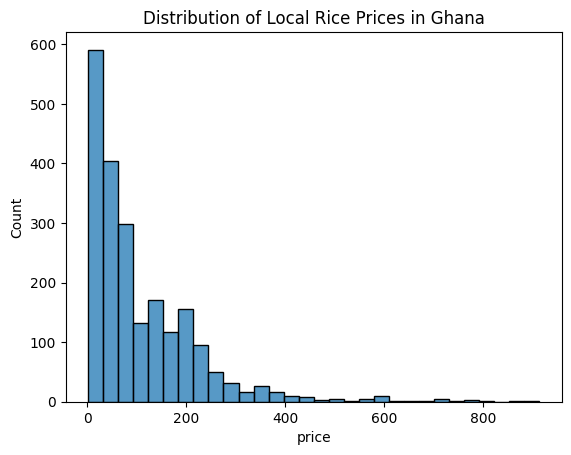

In [7]:
sns.histplot(rice_df.price.dropna(), bins=30);
plt.title("Distribution of Local Rice Prices in Ghana");

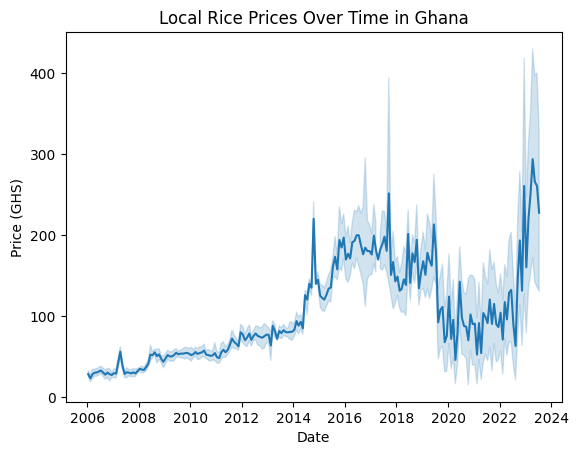

In [8]:
sns.lineplot(data=rice_df, x="date", y="price");
plt.title("Local Rice Prices Over Time in Ghana");
plt.xlabel("Date");
plt.ylabel("Price (GHS)");

In [9]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2166 entries, 1 to 26648
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2166 non-null   datetime64[ns]
 1   admin1        2166 non-null   object        
 2   admin2        2166 non-null   object        
 3   market        2166 non-null   object        
 4   market_id     2166 non-null   int64         
 5   latitude      2166 non-null   float64       
 6   longitude     2166 non-null   float64       
 7   category      2166 non-null   object        
 8   commodity     2166 non-null   object        
 9   commodity_id  2166 non-null   int64         
 10  unit          2166 non-null   object        
 11  priceflag     2166 non-null   object        
 12  pricetype     2166 non-null   object        
 13  currency      2166 non-null   object        
 14  price         2166 non-null   float64       
 15  usdprice      2166 non-null   float64     

In [10]:
# Ensure numeric values for coordinates and price
rice_df['price'] = pd.to_numeric(rice_df['price'], errors='coerce')
rice_df['latitude'] = pd.to_numeric(rice_df['latitude'], errors='coerce')
rice_df['longitude'] = pd.to_numeric(rice_df['longitude'], errors='coerce')

# Drop rows without valid locations or prices
rice_df = rice_df.dropna(subset=['latitude', 'longitude', 'price'])

print("Remaining rows after cleaning:", len(rice_df))
rice_df.head()


Remaining rows after cleaning: 2166


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65


In [11]:
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
rice_gdf = gpd.GeoDataFrame(
    rice_df,
    geometry=gpd.points_from_xy(rice_df.longitude, rice_df.latitude),
    crs="EPSG:4326"  # WGS84 latitude/longitude
)

rice_gdf.head()


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93,POINT (-1.62 6.68)
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26,POINT (-0.22 5.55)
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34,POINT (-2.48 10.05)
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33,POINT (-1.93 7.58)
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65,POINT (-0.83 9.4)


In [12]:
%pip install fiona

Note: you may need to restart the kernel to use updated packages.


In [13]:
gpd.options.io_engine = "fiona"  # ensure stable reading

geojson_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/geoBoundaries-GHA-ADM1_simplified.geojson"

regions = gpd.read_file(geojson_path)

# Check projection and columns
regions.crs, regions.head()


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
               shapeName shapeISO                  shapeID shapeGroup  \
 0  Western North Region    GH-WN  69750345B35244651716901        GHA   
 1          Ahafo Region    GH-AF  69750345B39836988306125        GHA   
 2      Bono East Region    GH-BE  69750345B43572680159989        GHA   
 3       Savannah Region    GH-SV  69750345B26994269439887        GHA   
 4     North East Region    GH-NE  69750345B94584643914501        GHA   
 
   shapeType                                           geometry  
 0      ADM1  POLYGON ((-2.57218 5.74991, -2.56119 5.79226, ...  
 1      ADM1  POLYGON ((-2.42467 6.38815, -2.42346 6.39658, ...  
 2      ADM1  POLYGON ((-0.13624 7.82498,

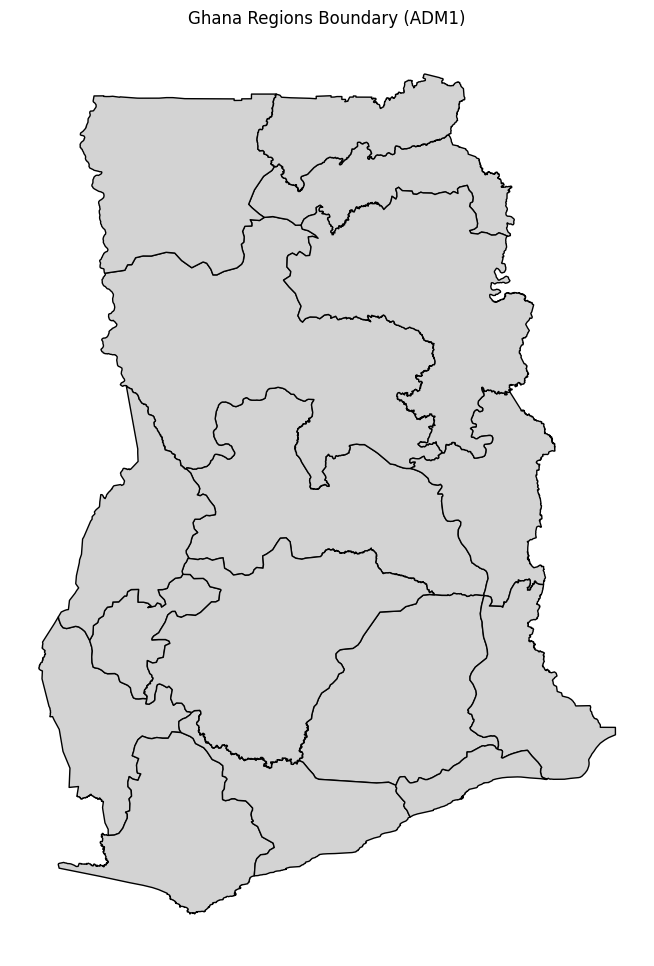

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
regions.plot(ax=ax, color="lightgray", edgecolor="black")
ax.set_title("Ghana Regions Boundary (ADM1)")
ax.set_axis_off()


In [16]:
# Ensure both are in the same CRS
rice_gdf = rice_gdf.to_crs("EPSG:4326")
regions = regions.to_crs("EPSG:4326")

# Spatial join: assign each rice observation to a region
rice_with_regions = gpd.sjoin(
    rice_gdf,
    regions[["shapeName", "geometry"]],  # We keep only needed columns
    how="inner",
    predicate="within"
)

print("Rows after spatial join:", len(rice_with_regions))
rice_with_regions.head()


Rows after spatial join: 2038


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,geometry,index_right,shapeName
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93,POINT (-1.62 6.68),10,Ashanti Region
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26,POINT (-0.22 5.55),15,Greater Accra Region
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34,POINT (-2.48 10.05),13,Upper West Region
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33,POINT (-1.93 7.58),2,Bono East Region
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65,POINT (-0.83 9.4),8,Northern Region


In [17]:
rice_region_stats = (
    rice_with_regions
    .groupby("shapeName")["price"]
    .median()
    .reset_index()
    .rename(columns={"shapeName": "region", "price": "median_price"})
)

rice_region_stats


,region,median_price
0,Ashanti Region,60.000
1,Bono East Region,75.000
2,Bono Region,75.000
3,Central Region,74.500
4,Eastern Region,65.000
5,Greater Accra Region,89.500
6,North East Region,245.000
7,Northern Region,59.600
8,Oti Region,276.730
9,Upper East Region,68.250


In [18]:
regions_stats = regions.merge(
    rice_region_stats,
    left_on="shapeName",
    right_on="region",
    how="left"
)

regions_stats.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,region,median_price
0,Western North Region,GH-WN,69750345B35244651716901,GHA,ADM1,"POLYGON ((-2.57218 5.74991, -2.56119 5.79226, ...",NaN,NaN
1,Ahafo Region,GH-AF,69750345B39836988306125,GHA,ADM1,"POLYGON ((-2.42467 6.38815, -2.42346 6.39658, ...",NaN,NaN
2,Bono East Region,GH-BE,69750345B43572680159989,GHA,ADM1,"POLYGON ((-0.13624 7.82498, -0.14542 7.9031, -...",Bono East Region,75.0
3,Savannah Region,GH-SV,69750345B26994269439887,GHA,ADM1,"POLYGON ((-0.38471 8.15282, -0.36534 8.16333, ...",NaN,NaN
4,North East Region,GH-NE,69750345B94584643914501,GHA,ADM1,"POLYGON ((-1.23184 10.01754, -1.20987 10.06216...",North East Region,245.0


In [21]:
regions_stats.values

array([['Western North Region', 'GH-WN', '69750345B35244651716901',
        'GHA', 'ADM1',
        <POLYGON ((-2.572 5.75, -2.561 5.792, -2.534 5.773, -2.494 5.764, -2.486 5.7...>,
        nan, nan],
       ['Ahafo Region', 'GH-AF', '69750345B39836988306125', 'GHA',
        'ADM1',
        <POLYGON ((-2.425 6.388, -2.423 6.397, -2.425 6.405, -2.422 6.407, -2.429 6....>,
        nan, nan],
       ['Bono East Region', 'GH-BE', '69750345B43572680159989', 'GHA',
        'ADM1',
        <POLYGON ((-0.136 7.825, -0.145 7.903, -0.142 7.935, -0.137 7.94, -0.135 7.9...>,
        'Bono East Region', 75.0],
       ['Savannah Region', 'GH-SV', '69750345B26994269439887', 'GHA',
        'ADM1',
        <POLYGON ((-0.385 8.153, -0.365 8.163, -0.354 8.166, -0.352 8.173, -0.356 8....>,
        nan, nan],
       ['North East Region', 'GH-NE', '69750345B94584643914501', 'GHA',
        'ADM1',
        <POLYGON ((-1.232 10.018, -1.21 10.062, -1.173 10.088, -1.126 10.1, -1.112 1...>,
        'North East Reg

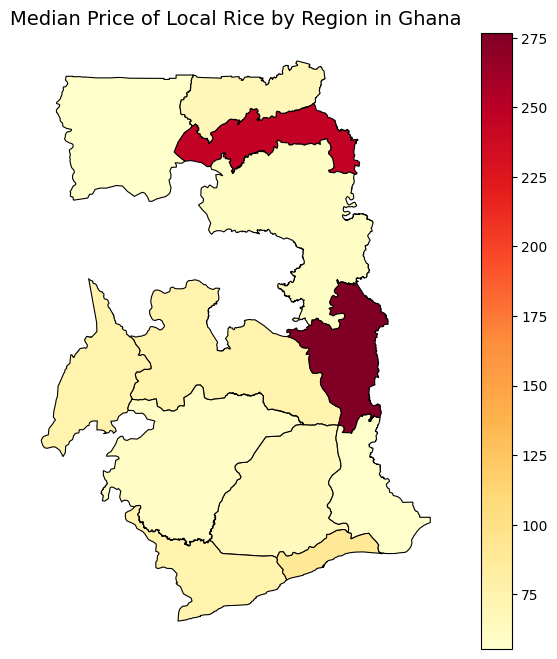

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
regions_stats.plot(
    column="median_price",
    cmap="YlOrRd",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
)
ax.set_title("Median Price of Local Rice by Region in Ghana", fontsize=14)
ax.set_axis_off()
plt.show()


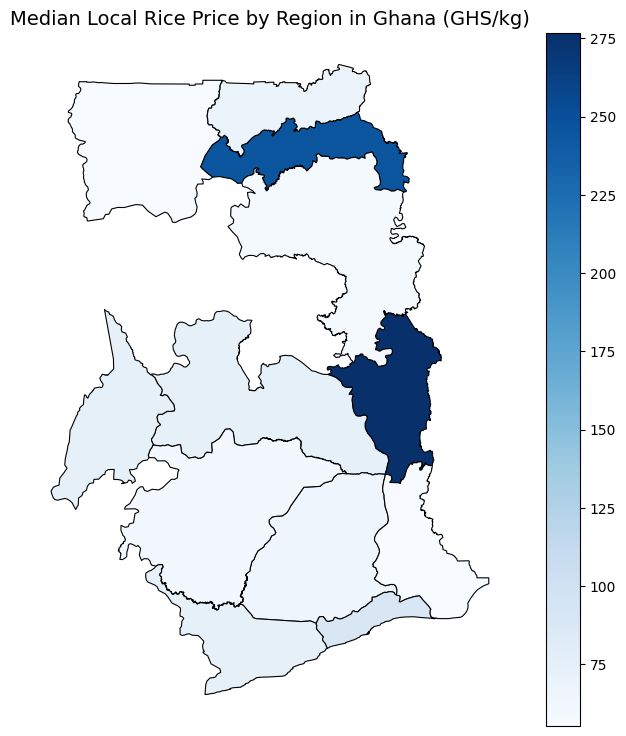

In [22]:
fig, ax = plt.subplots(figsize=(9, 9))
regions_stats.plot(
    column="median_price",
    cmap="Blues",  # professional neutral palette
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Median Local Rice Price by Region in Ghana (GHS/kg)", fontsize=14)
ax.set_axis_off()
plt.show()


In [23]:
# Drop rows with missing values for ranking
ranked = regions_stats.dropna(subset=["median_price"])[["shapeName", "median_price"]]

cheapest = ranked.nsmallest(5, "median_price")
most_expensive = ranked.nlargest(5, "median_price")

print("Cheapest regions:")
display(cheapest)

print("\nMost expensive regions:")
display(most_expensive)


Cheapest regions:


,shapeName,median_price
12,Volta Region,55.315
13,Upper West Region,56.130
8,Northern Region,59.600
10,Ashanti Region,60.000
7,Eastern Region,65.000



Most expensive regions:


,shapeName,median_price
5,Oti Region,276.73
4,North East Region,245.00
15,Greater Accra Region,89.50
2,Bono East Region,75.00
11,Bono Region,75.00


In [25]:
regions_stats.to_file("/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson", driver="GeoJSON")
print("Saved to /home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson")


Saved to /home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson
